In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import torch
import transformers
from transformers import DataCollatorForLanguageModeling
import datasets
from datasets import load_dataset, Dataset
from datasets import Dataset, DatasetDict
from pathlib import Path
from torch.utils.data import Dataset
import numpy as np
from transformers import AdamW
import tqdm
from torch.utils.data import DataLoader
import pandas as pd
from transformers import BertForMaskedLM, BertTokenizer, pipeline, BertConfig

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DL_FA24/Final_project/

/content/drive/MyDrive/DL_FA24/Final_project


In [ ]:
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/361 [00:00<?, ?B/s]

In [ ]:
model = BertForMaskedLM.from_pretrained("Rostlab/prot_bert")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/361 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at Rostlab/prot_bert were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'c

In [ ]:
# check number of parameters of the model
model.num_parameters()

419933214

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the selected device
print(f"Using device: {device}")

Using device: cuda


In [ ]:
print(model)

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30, 1024, padding_idx=0)
      (position_embeddings): Embedding(40000, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-29): 30 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1e-1

In [ ]:
model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "Rostlab/prot_bert",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 40000,
  "model_type": "bert",
  "num_attention_heads": 16,
  "num_hidden_layers": 30,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.46.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30
}

In [ ]:
base_dr = "/content/drive/MyDrive/DL_FA24/Final_project/"
data_set_paths = {"train": base_dr+"train_masked_dataset.csv", "test": base_dr+"test_masked_dataset.csv", "val": base_dr+"val_masked_dataset.csv"}
split_datasets = load_dataset('csv', data_files=data_set_paths, cache_dir=base_dr)


In [ ]:
train_dataloader = DataLoader(split_datasets['train'],batch_size=69)
val_dataloader = DataLoader(split_datasets['val'],batch_size=69)
test_dataloader = DataLoader(split_datasets['test'],batch_size=69)
data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=True, mlm_probability=0.15,return_tensors="pt")
data_collator2 = DataCollatorForLanguageModeling(tokenizer, mlm=True, mlm_probability=1.0,return_tensors="pt")

In [ ]:
seq = "A R V D Q T P Q T I T K E T G E S L T I N C V L R D S N C A L S S T Y W Y R K K S G S T N E E S I S K G G R Y V E T V N S G S K S F S L R I N D L T V E D S G T Y R C"
tokenized_output = tokenizer(seq, return_tensors='pt', max_length=512)
print(tokenized_output)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


{'input_ids': tensor([[ 2,  6, 13,  8, 14, 18, 15, 16, 18, 15, 11, 15, 12,  9, 15,  7,  9, 10,
          5, 15, 11, 17, 23,  8,  5, 13, 14, 10, 17, 23,  6,  5, 10, 10, 15, 20,
         24, 20, 13, 12, 12, 10,  7, 10, 15, 17,  9,  9, 10, 11, 10, 12,  7,  7,
         13, 20,  8,  9, 15,  8, 17, 10,  7, 10, 12, 10, 19, 10,  5, 13, 11, 17,
         14,  5, 15,  8,  9, 14, 10,  7, 15, 20, 13, 23,  3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1

In [ ]:
tokenized_output2 = data_collator([{"input_ids": input_id, "attention_mask": attention_mask} for input_id, attention_mask in zip(tokenized_output['input_ids'], tokenized_output['attention_mask'])])
tokenized_output2

{'input_ids': tensor([[ 2,  6, 13,  8, 14, 18,  4, 16, 18, 15, 11, 15,  4,  9, 15,  7,  9, 10,
          5, 15, 24,  4, 23,  8,  5, 13, 14,  4,  4, 23,  6,  5, 10, 10, 15, 20,
         24, 20, 13, 12, 12, 10,  4, 10, 15, 17,  9,  4, 10, 11, 10, 12,  7,  4,
         13,  4,  8,  9, 15,  8, 17,  4,  7, 10, 12, 10, 19, 10,  5,  4, 11,  4,
         14,  5, 15,  8,  9,  4, 10,  7, 15, 20, 13, 23,  3]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'labels': tensor([[-100, -100, -100, -100, -100, -100,   15, -100, -100, -100, -100, -100,
           12, -100, -100, -100, -100, -100, -100, -100,   11,   17,   23, -100,
         -100, -100, -100,   10,   17, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, 

In [ ]:
tokenized_output3 = data_collator2([{"input_ids": input_id, "attention_mask": attention_mask} for input_id, attention_mask in zip(tokenized_output['input_ids'], tokenized_output['attention_mask'])])
tokenized_output3

{'input_ids': tensor([[ 2,  4, 25,  8, 29,  4, 15,  4,  4,  4,  4, 15,  4,  4,  4,  4,  4,  4,
          4, 23,  4,  4,  4,  4,  4,  4,  4, 21,  4,  4,  4,  4, 10,  4,  3,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  9,  4, 10,  4,  4,  0,  4,  4,
          4,  4,  2,  9,  4,  8,  4,  4,  4,  4,  4, 10,  4,  4,  4,  5,  4,  4,
          4, 16,  4,  4,  4,  4, 10,  4,  4,  4,  4, 23,  3]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'labels': tensor([[-100,    6,   13,    8,   14,   18,   15,   16,   18,   15,   11,   15,
           12,    9,   15,    7,    9,   10,    5,   15,   11,   17,   23,    8,
            5,   13,   14,   10,   17,   23,    6,    5,   10,   10,   15,   20,
           24,   20,   13,   12, 

In [ ]:
def fit(model, train_dataloader, val_dataloader, optimizer, tokenizer, data_collator, epochs=1):
    model.train()
    all_train_losses = []
    all_val_losses = []
    all_val_accuracies = []

    for epoch in range(epochs):
        # Training loop
        model.train()
        epoch_train_loss = 0

        for batch in train_dataloader:
            optimizer.zero_grad()

            # Prepare inputs
            sequences = batch['OriginalSequence']
            sequences = [" ".join(seq) for seq in sequences]
            tokenized_seq = tokenizer(sequences, padding=True, return_tensors='pt')
            tokenized_seq = data_collator(
                [{"input_ids": input_id, "attention_mask": attention_mask} for input_id, attention_mask in zip(tokenized_seq['input_ids'], tokenized_seq['attention_mask'])]
            )
            input_ids = tokenized_seq['input_ids'].to(model.device)
            attention_mask = tokenized_seq['attention_mask'].to(model.device)
            labels = tokenized_seq['labels'].to(model.device)

            # Forward pass
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = F.cross_entropy(outputs.logits.view(-1, outputs.logits.shape[-1]), labels.view(-1))
            loss.backward()
            optimizer.step()

            # Accumulate training loss
            epoch_train_loss += loss.item()

        avg_train_loss = epoch_train_loss / len(train_dataloader)
        all_train_losses.append(avg_train_loss)

        # Validation loop
        model.eval()
        epoch_val_loss = 0
        correct_predictions = 0
        total_predictions = 0

        with torch.no_grad():
            for batch in val_dataloader:
                # Prepare inputs
                sequences = batch['OriginalSequence']
                sequences = [" ".join(seq) for seq in sequences]
                tokenized_seq = tokenizer(sequences, padding=True, return_tensors='pt')
                tokenized_seq = data_collator(
                    [{"input_ids": input_id, "attention_mask": attention_mask} for input_id, attention_mask in zip(tokenized_seq['input_ids'], tokenized_seq['attention_mask'])]
                )
                input_ids = tokenized_seq['input_ids'].to(model.device)
                attention_mask = tokenized_seq['attention_mask'].to(model.device)
                labels = tokenized_seq['labels'].to(model.device)

                # Forward pass
                outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                loss = F.cross_entropy(outputs.logits.view(-1, outputs.logits.shape[-1]), labels.view(-1))

                # Accumulate validation loss
                epoch_val_loss += loss.item()

                # Calculate accuracy
                preds = torch.argmax(outputs.logits, dim=-1)
                mask = labels != -100
                correct_predictions += (preds[mask] == labels[mask]).sum().item()
                total_predictions += mask.sum().item()

        avg_val_loss = epoch_val_loss / len(val_dataloader)
        val_accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
        all_val_losses.append(avg_val_loss)
        all_val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{epochs} - Train Loss: {avg_train_loss:.4f} - Val Loss: {avg_val_loss:.4f} - Val Accuracy: {val_accuracy:.4f}")

    return all_train_losses, all_val_losses, all_val_accuracies


In [ ]:
model2 = BertForMaskedLM.from_pretrained("Rostlab/prot_bert")

model2.to(device)

for param in model2.parameters():
    param.requires_grad = True

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at Rostlab/prot_bert were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'c

In [ ]:
optimizer2 = AdamW(filter(lambda p: p.requires_grad, model2.parameters()), lr=1e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
train_losses2, val_losses2, val_accuracies2 = fit(
    model2,
    train_dataloader,
    val_dataloader,
    optimizer2,
    tokenizer,
    data_collator,
    epochs=50)

Epoch 1/50 - Train Loss: 0.8460 - Val Loss: 0.8641 - Val Accuracy: 0.7699
Epoch 2/50 - Train Loss: 0.6916 - Val Loss: 0.8533 - Val Accuracy: 0.7742
Epoch 3/50 - Train Loss: 0.6120 - Val Loss: 0.8422 - Val Accuracy: 0.7743
Epoch 4/50 - Train Loss: 0.5893 - Val Loss: 0.8136 - Val Accuracy: 0.7807
Epoch 5/50 - Train Loss: 0.5566 - Val Loss: 0.7773 - Val Accuracy: 0.7928
Epoch 6/50 - Train Loss: 0.5355 - Val Loss: 0.7683 - Val Accuracy: 0.7891
Epoch 7/50 - Train Loss: 0.5082 - Val Loss: 0.7367 - Val Accuracy: 0.8031
Epoch 8/50 - Train Loss: 0.4842 - Val Loss: 0.7507 - Val Accuracy: 0.8023
Epoch 9/50 - Train Loss: 0.4640 - Val Loss: 0.6967 - Val Accuracy: 0.8118
Epoch 10/50 - Train Loss: 0.4530 - Val Loss: 0.6945 - Val Accuracy: 0.8110
Epoch 11/50 - Train Loss: 0.4335 - Val Loss: 0.6534 - Val Accuracy: 0.8205
Epoch 12/50 - Train Loss: 0.4256 - Val Loss: 0.6430 - Val Accuracy: 0.8263
Epoch 13/50 - Train Loss: 0.4166 - Val Loss: 0.6218 - Val Accuracy: 0.8302
Epoch 14/50 - Train Loss: 0.4038 -

In [ ]:
save_directory = "./fine_tuned_ProtBERT/model2"

In [ ]:
model2.save_pretrained(save_directory)

In [ ]:
tokenizer.save_pretrained(save_directory)

('./fine_tuned_ProtBERT/model2/tokenizer_config.json',
 './fine_tuned_ProtBERT/model2/special_tokens_map.json',
 './fine_tuned_ProtBERT/model2/vocab.txt',
 './fine_tuned_ProtBERT/model2/added_tokens.json')

In [ ]:
model3 = BertForMaskedLM.from_pretrained("Rostlab/prot_bert")

model3.to(device)

for param in model3.parameters():
    param.requires_grad = False

# Unfreeze the last two layers
for param in model3.bert.encoder.layer[29].parameters():
    param.requires_grad = True

for param in model3.bert.encoder.layer[28].parameters():
    param.requires_grad = True

Some weights of the model checkpoint at Rostlab/prot_bert were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
optimizer3 = AdamW(filter(lambda p: p.requires_grad, model3.parameters()), lr=1e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
train_losses3, val_losses3, val_accuracies3 = fit(
    model3,
    train_dataloader,
    val_dataloader,
    optimizer3,
    tokenizer,
    data_collator,
    epochs=50)

Epoch 1/50 - Train Loss: 0.8416 - Val Loss: 0.8900 - Val Accuracy: 0.7633
Epoch 2/50 - Train Loss: 0.7609 - Val Loss: 0.8926 - Val Accuracy: 0.7623
Epoch 3/50 - Train Loss: 0.7355 - Val Loss: 0.8657 - Val Accuracy: 0.7624
Epoch 4/50 - Train Loss: 0.7046 - Val Loss: 0.8605 - Val Accuracy: 0.7647
Epoch 5/50 - Train Loss: 0.6714 - Val Loss: 0.8556 - Val Accuracy: 0.7626
Epoch 6/50 - Train Loss: 0.6478 - Val Loss: 0.8191 - Val Accuracy: 0.7763
Epoch 7/50 - Train Loss: 0.6124 - Val Loss: 0.8170 - Val Accuracy: 0.7794
Epoch 8/50 - Train Loss: 0.5798 - Val Loss: 0.8112 - Val Accuracy: 0.7803
Epoch 9/50 - Train Loss: 0.5623 - Val Loss: 0.7984 - Val Accuracy: 0.7880
Epoch 10/50 - Train Loss: 0.5416 - Val Loss: 0.7840 - Val Accuracy: 0.7905
Epoch 11/50 - Train Loss: 0.5375 - Val Loss: 0.7793 - Val Accuracy: 0.7902
Epoch 12/50 - Train Loss: 0.5193 - Val Loss: 0.7497 - Val Accuracy: 0.7987
Epoch 13/50 - Train Loss: 0.5152 - Val Loss: 0.7495 - Val Accuracy: 0.7996
Epoch 14/50 - Train Loss: 0.5014 -

In [ ]:
save_directory = "./fine_tuned_ProtBERT/model3"

In [ ]:
model3.save_pretrained(save_directory)

In [ ]:
tokenizer.save_pretrained(save_directory)

('./fine_tuned_ProtBERT/model3/tokenizer_config.json',
 './fine_tuned_ProtBERT/model3/special_tokens_map.json',
 './fine_tuned_ProtBERT/model3/vocab.txt',
 './fine_tuned_ProtBERT/model3/added_tokens.json')

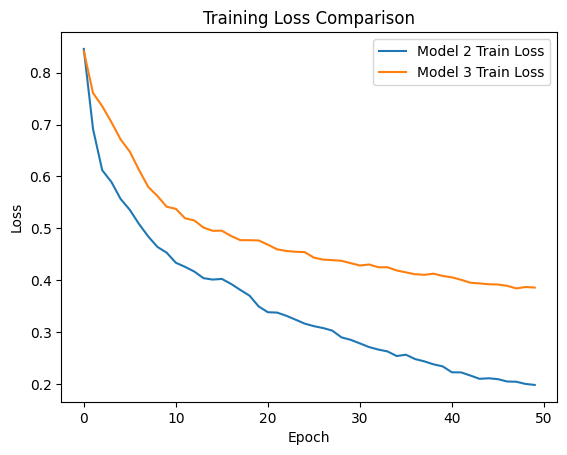

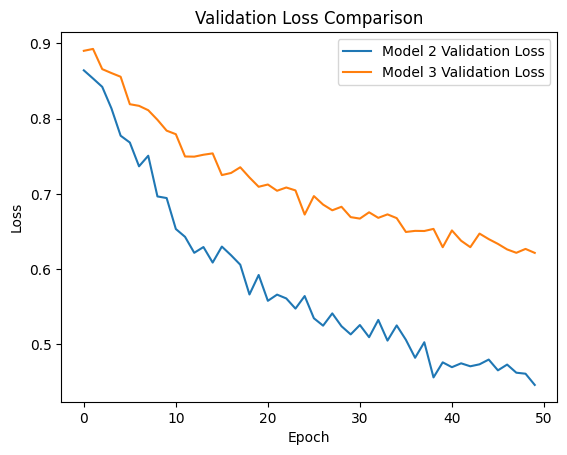

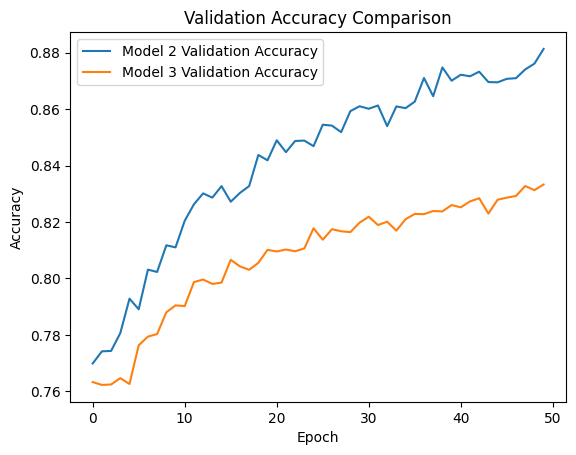

In [ ]:
import matplotlib.pyplot as plt

# Plot training losses
plt.plot(train_losses2, label='Model 2 Train Loss')
plt.plot(train_losses3, label='Model 3 Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.show()

# Plot validation losses
plt.plot(val_losses2, label='Model 2 Validation Loss')
plt.plot(val_losses3, label='Model 3 Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.show()

# Plot validation accuracies
plt.plot(val_accuracies2, label='Model 2 Validation Accuracy')
plt.plot(val_accuracies3, label='Model 3 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.show()

